In [173]:
import numpy as np
import ps_utils
import numpy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
datasets = dict(
    beethoven='Beethoven',
    mat_vase='mat_vase',
    shiny_vase='shiny_vase',
    shiny_vase2='shiny_vase2',
    buddha='Buddha',
    face='face',
)

In [184]:
I, mask, S = ps_utils.read_data_file('mat_vase')
print(I.shape)
print(mask.shape)
print(S.shape)
count_Is = I.shape[2]

(256, 256, 3)
(256, 256)
(3, 3)


In [185]:
nz = np.nonzero(mask)
count_nz = len(nz[0])

count_nz

24828

In [186]:
J = np.vstack([I[:, :, i][nz] for i in range(3)])
assert(J.shape == (count_Is, count_nz))

In [187]:
M = np.linalg.inv(S) @ J

In [188]:
Rho = la.norm(M, axis=0)
N = M / np.tile(Rho, (count_Is, 1))

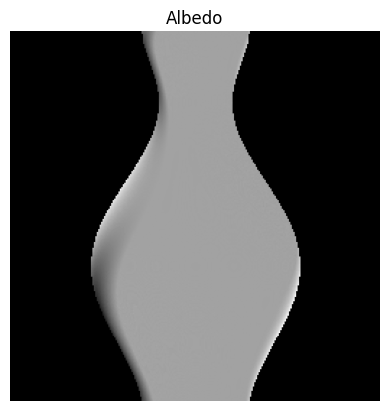

In [189]:
albedo = np.zeros(mask.shape)
albedo[nz] = Rho

plt.imshow(albedo, cmap='gray')
plt.axis('off')
plt.title('Albedo')
plt.show()

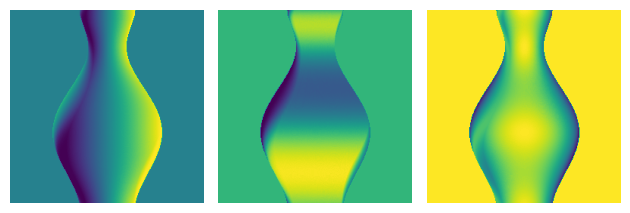

In [191]:
n1 = np.zeros(mask.shape)
n2 = np.zeros(mask.shape)
n3 = np.ones(mask.shape)

n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, count_Is)
ax1.imshow(n1)
ax1.axis('off')
ax2.imshow(n2)
ax2.axis('off')
ax3.imshow(n3)
ax3.axis('off')
plt.tight_layout()
plt.show()

albedo mapping is not implemented yet...


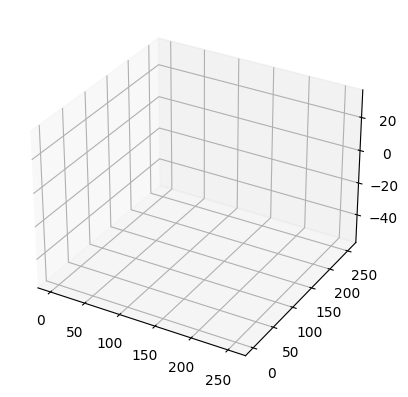

In [193]:
z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z, albedo=Rho)